# Init

## Importing libraries

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

## Configuring libraries

In [2]:
pd.set_option('display.max_columns', None)

# Defining functions

In [3]:
def tf_to_bool(v):
    "changes t | f to type bool, returns None when neither t or f"
    match v:
        case 't':
            return True
        case 'f':
            return False
        case _:
            return None

# Loading data

## read from CSV

```python
# https://stackoverflow.com/a/53742380/13165967
df = pd.read_csv("in.csv", converters={"Col3": lambda x: x.strip("[]").replace("'","").split(", ")})
```

In [4]:
dtype = {
    'listing_id': 'Int64',
    'name': 'string',
    'host_id': 'Int64',
    'host_since': 'string',
    'host_location': 'string',
    'host_response_time': 'category',
    'host_response_rate': 'float',
    'host_acceptance_rate': 'float',
    'host_total_listings_count': 'Int64',
    'neighbourhood': 'category',
    'district': 'category',
    'city': 'category',
    'latitude': 'float',
    'longitude': 'float',
    'property_type': 'category',
    'room_type': 'category',
    'accommodates': 'Int64',
    'bedrooms': 'Int64',
    'price': 'Int64',
    'minimum_nights': 'Int64',
    'maximum_nights': 'Int64',
    'review_scores_rating': 'Int64',
    'review_scores_accuracy': 'Int64',
    'review_scores_cleanliness': 'Int64',
    'review_scores_checkin': 'Int64',
    'review_scores_communication': 'Int64',
    'review_scores_location': 'Int64',
    'review_scores_value': 'Int64',
}

In [5]:
converters = {
    **{x: tf_to_bool for x in ['instant_bookable', 'host_identity_verified', 'host_has_profile_pic', 'host_is_superhost']},
    'amenities': lambda x: x.strip("[]").replace("'", "").split(", ")
}

In [6]:
df = pd.read_csv(
    'data/listings.csv',
    encoding="unicode_escape",
    dtype=dtype,
    converters=converters
)

C:\Users\lande\AppData\Local\Temp\ipykernel_4384\3952181147.py:1: DtypeWarning: Columns (8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


## boolean type fixes

Fixing the `DtypeWarning` for the columns`(8,10,11)`, setting those types to type *bool*

In [7]:
for c in ["host_has_profile_pic", "host_identity_verified", "host_is_superhost"]:
    df[c] = df[c].astype(bool)

## `host_since` to `datetime`

In [8]:
df["host_since"] = pd.to_datetime(df["host_since"], format='%Y-%m-%d')

# Data analytics

In [9]:
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,district,city,latitude,longitude,property_type,room_type,accommodates,bedrooms,amenities,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1,True,False,Buttes-Montmartre,NaN,Paris,48.88668,2.33343,Entire apartment,Entire place,2,1,"[""Heating"", ""Kitchen"", ""Washer"", ""Wifi"", ""Long...",53,2,1125,100,10,10,10,10,10,10,False
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1,True,True,Buttes-Montmartre,NaN,Paris,48.88617,2.34515,Entire apartment,Entire place,2,1,"[""Shampoo"", ""Heating"", ""Kitchen"", ""Essentials""...",120,2,1125,100,10,10,10,10,10,10,False
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1,True,False,Elysee,NaN,Paris,48.88112,2.31712,Entire apartment,Entire place,2,1,"[""Heating"", ""TV"", ""Kitchen"", ""Washer"", ""Wifi"",...",89,2,1125,100,10,10,10,10,10,10,False
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1,True,True,Vaugirard,NaN,Paris,48.84571,2.30584,Entire apartment,Entire place,2,1,"[""Heating"", ""TV"", ""Kitchen"", ""Wifi"", ""Long ter...",58,2,1125,100,10,10,10,10,10,10,False
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,False,1,True,False,Passy,NaN,Paris,48.85500,2.26979,Entire apartment,Entire place,2,1,"[""Heating"", ""TV"", ""Kitchen"", ""Essentials"", ""Ha...",60,2,1125,100,10,10,10,10,10,10,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  Int64         
 1   name                         279539 non-null  string        
 2   host_id                      279712 non-null  Int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  string        
 5   host_response_time           150930 non-null  category      
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279712 non-null  bool          
 9   host_total_listings_count    279547 non-null  Int64         
 10  host_has_profile_pic         279712 non-null  bool          
 11  host_identity_verified    

In [11]:
df.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,279712.0,279712.0,150930.000000,166625.000000,279547.0,279712.000000,279712.000000,279712.0,250277.0,279712.0,279712.0,279712.0,188307.0,187999.0,188047.0,187941.0,188025.0,187937.0,187927.0
mean,26381955.489825,108165773.085531,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,27558.596667,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,14425758.688779,110856993.215897,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.15308,3441.826611,31.518946,7282875.162316,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2577.0,1822.0,0.000000,0.000000,0.0,-34.264400,-99.339630,0.0,1.0,0.0,1.0,1.0,20.0,2.0,2.0,2.0,2.0,2.0,2.0
25%,13844618.75,17206558.0,0.900000,0.780000,1.0,-22.964390,-43.198040,2.0,1.0,75.0,1.0,45.0,91.0,9.0,9.0,10.0,10.0,9.0,9.0
50%,27670985.0,58269113.5,1.000000,0.980000,1.0,40.710785,2.382780,2.0,1.0,150.0,2.0,1125.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0
75%,39784850.75,183285318.75,1.000000,1.000000,4.0,41.908610,28.986730,4.0,2.0,474.0,5.0,1125.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0
max,48343530.0,390187445.0,1.000000,1.000000,7235.0,48.904910,151.339810,16.0,50.0,625216.0,9999.0,2147483647.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0


## Exclude *superfluous* columns

In [12]:
df = df[df.columns.drop([
    "listing_id",
    "name",
    "host_id",
])]

## Null values

listing the number of null values in every column (and hide columns where $ \# null \neq 0$)

In [13]:
df_isnull_sum = df.isnull().sum()

null_values_df = pd.concat(
    [
        df_isnull_sum.rename('n_null'),
        (df_isnull_sum / df.shape[0]).rename('perc_null')
    ],
    axis=1
)

null_values_df = null_values_df[null_values_df.iloc[:, 0] != 0]
null_values_df.sort_values(by="n_null", inplace=True, ascending=False)

null_values_df

,n_null,perc_null
district,242700,0.867678
host_response_time,128782,0.460409
host_response_rate,128782,0.460409
host_acceptance_rate,113087,0.404298
review_scores_value,91785,0.328141
review_scores_location,91775,0.328105
review_scores_checkin,91771,0.328091
review_scores_accuracy,91713,0.327884
review_scores_communication,91687,0.327791
review_scores_cleanliness,91665,0.327712


<BarContainer object of 15 artists>

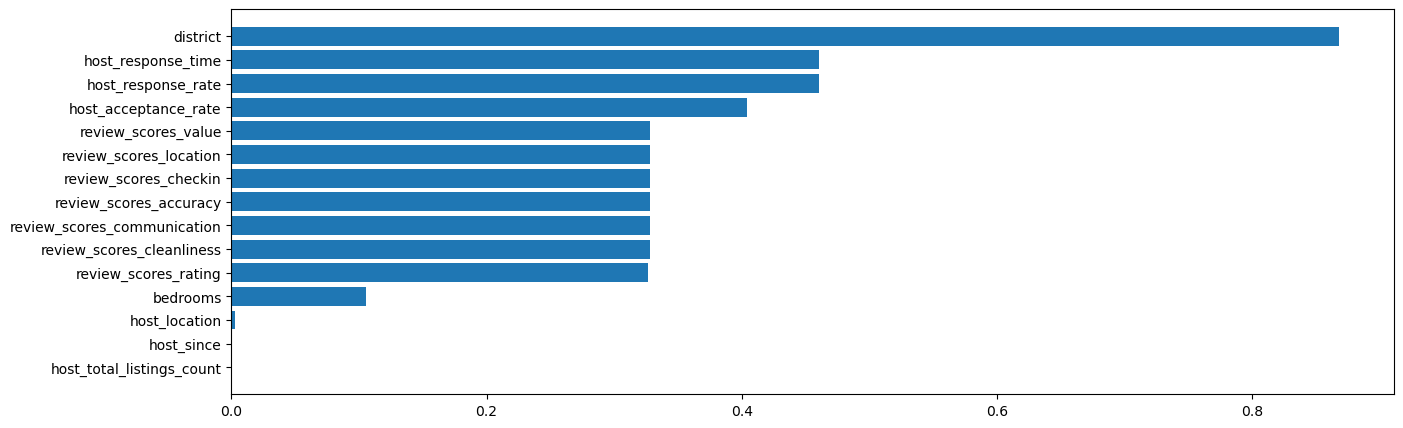

In [14]:
temp = null_values_df[::-1]  # reverse
plt.figure(figsize=(15, 5))
plt.barh(temp.index, temp["perc_null"].values)

After observing the percentage of *null* values, it would be impossible to include the `district` as a feature for the model, because it consists of $\approx 87\%$ *null* values.

`host_response_time` and `host_response_time` both constist of $\approx 46\%$ *null* values, including them would be inaccurate, so we will drop these two features as well.

In [15]:
df = df[df.columns.drop([
    'district',
    'host_response_time',
    'host_response_rate'
])]

Later, when training the model, we can test whether the `review_scores_*` reduces the model's error or not.

And we can impute the last 4 features (`bedrooms`, `host_location`, `host_since` and`host_total_listings_count`) because of the low(er) percentage.

## Categorical columns

In [16]:
def print_and_store_value_counts(s: pd.Series):
    vc = s.value_counts()
    print(vc)

    vc.to_csv(
        "analytics/categories/value_counts_%s.csv" %
        s.name.replace(" ", "_")
    )

In [17]:
df["property_type"].value_counts()

Entire apartment             138989
Private room in apartment     47322
Private room in house         13292
Entire house                  13273
Entire condominium            11250
                              ...  
Windmill                          1
Shared room in hut                1
Train                             1
Shared room in tent               1
Tipi                              1
Name: property_type, Length: 144, dtype: int64

In [18]:
print_and_store_value_counts(df["property_type"])

Entire apartment             138989
Private room in apartment     47322
Private room in house         13292
Entire house                  13273
Entire condominium            11250
                              ...  
Windmill                          1
Shared room in hut                1
Train                             1
Shared room in tent               1
Tipi                              1
Name: property_type, Length: 144, dtype: int64


In [19]:
print_and_store_value_counts(df["city"])

Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: city, dtype: int64


In [20]:
print_and_store_value_counts(df["neighbourhood"])

I Centro Storico     14874
Sydney                8074
Copacabana            7712
Cuauhtemoc            7626
Buttes-Montmartre     7237
                     ...  
Zumbi                    1
Woodrow                  1
Ward 50                  1
Ward 31                  1
Ward 40                  1
Name: neighbourhood, Length: 660, dtype: int64


## Plotting

In [21]:
# Selecting all the columns with a type of int or float

columns = df.dtypes[(df.dtypes == "Int64") | (df.dtypes == "float")].index
columns

Index(['host_acceptance_rate', 'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'price', 'minimum_nights',
       'maximum_nights', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value'],
      dtype='object')

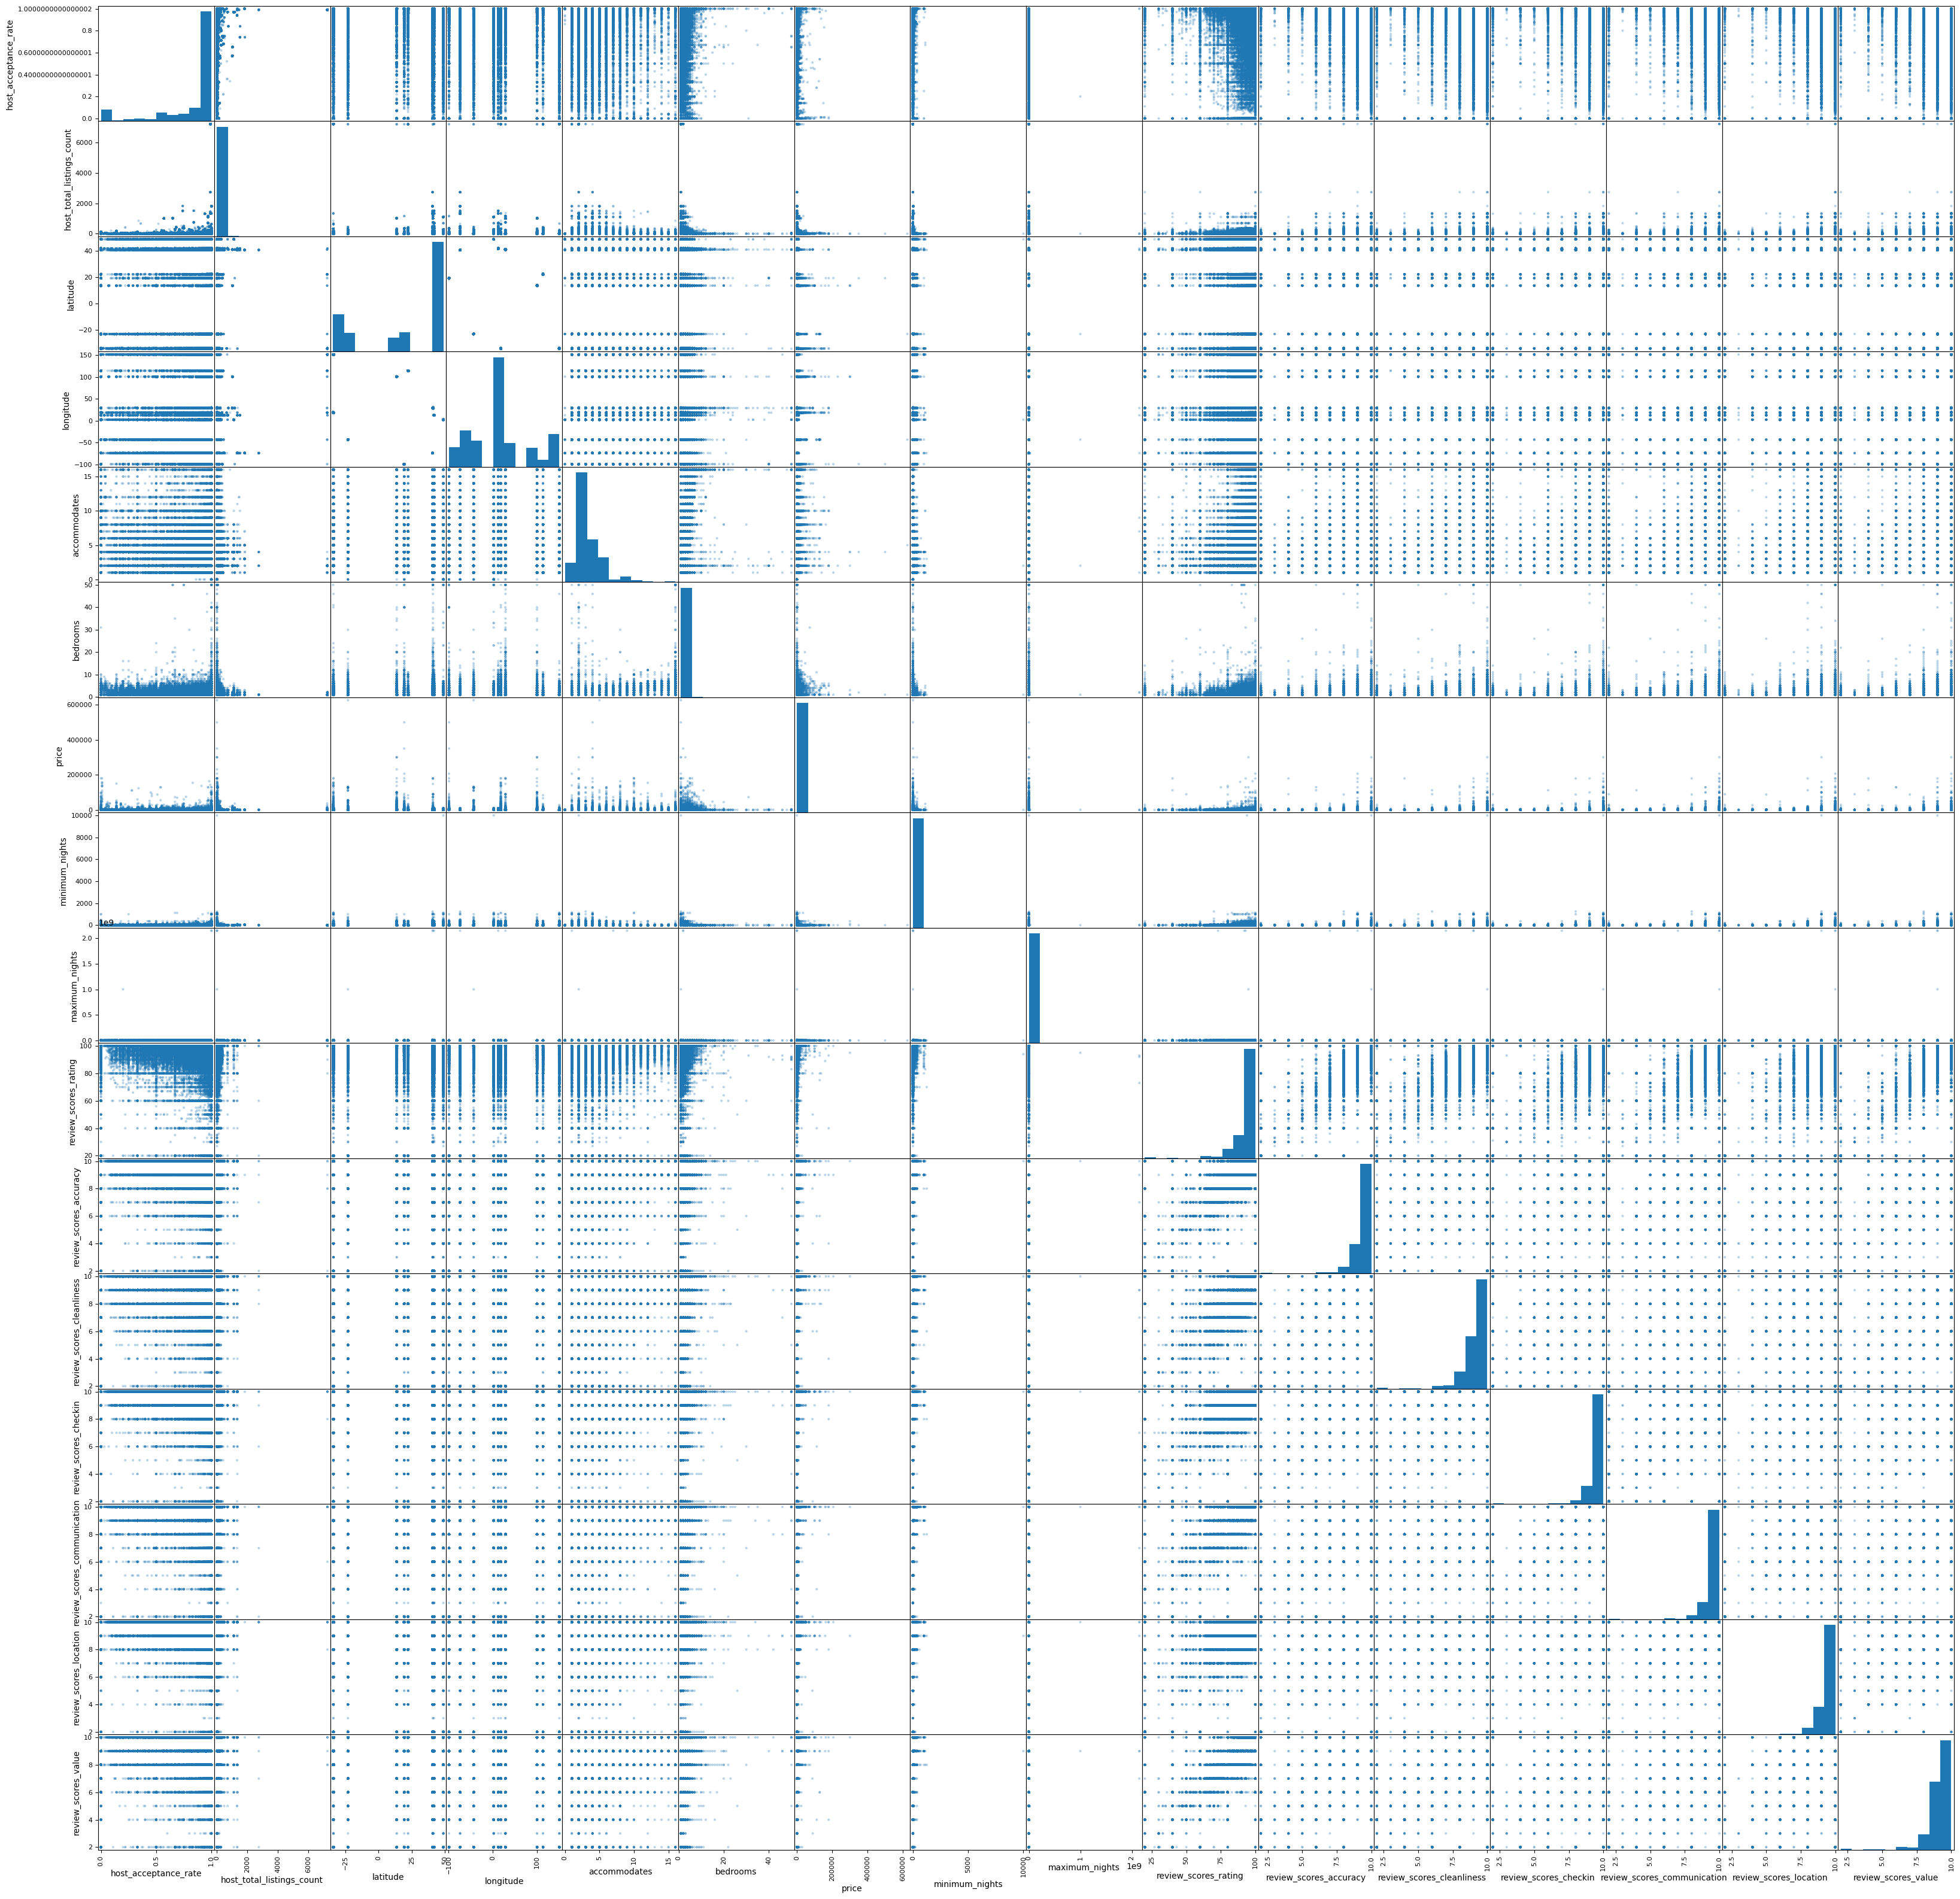

CPU times: total: 4min 9s
Wall time: 4min 10s


In [22]:
%%time
pd.plotting.scatter_matrix(df[columns], figsize=(40, 40), alpha=0.3) #diagonal="kde"
plt.show()

In [23]:
columns = df.dtypes[(df.dtypes == "Int64")].index


def to_float_when_int(s):
    return s.astype(float) if s.dtype == "Int64" else s


def subplots():
    fig, axes = plt.subplots(
        columns.size // 3 + (columns.size % 3 != 0),
        3,
        sharex=False,
        sharey=False,
        figsize=(18, 10)
    )

    fig.tight_layout(pad=2)

    return fig, axes

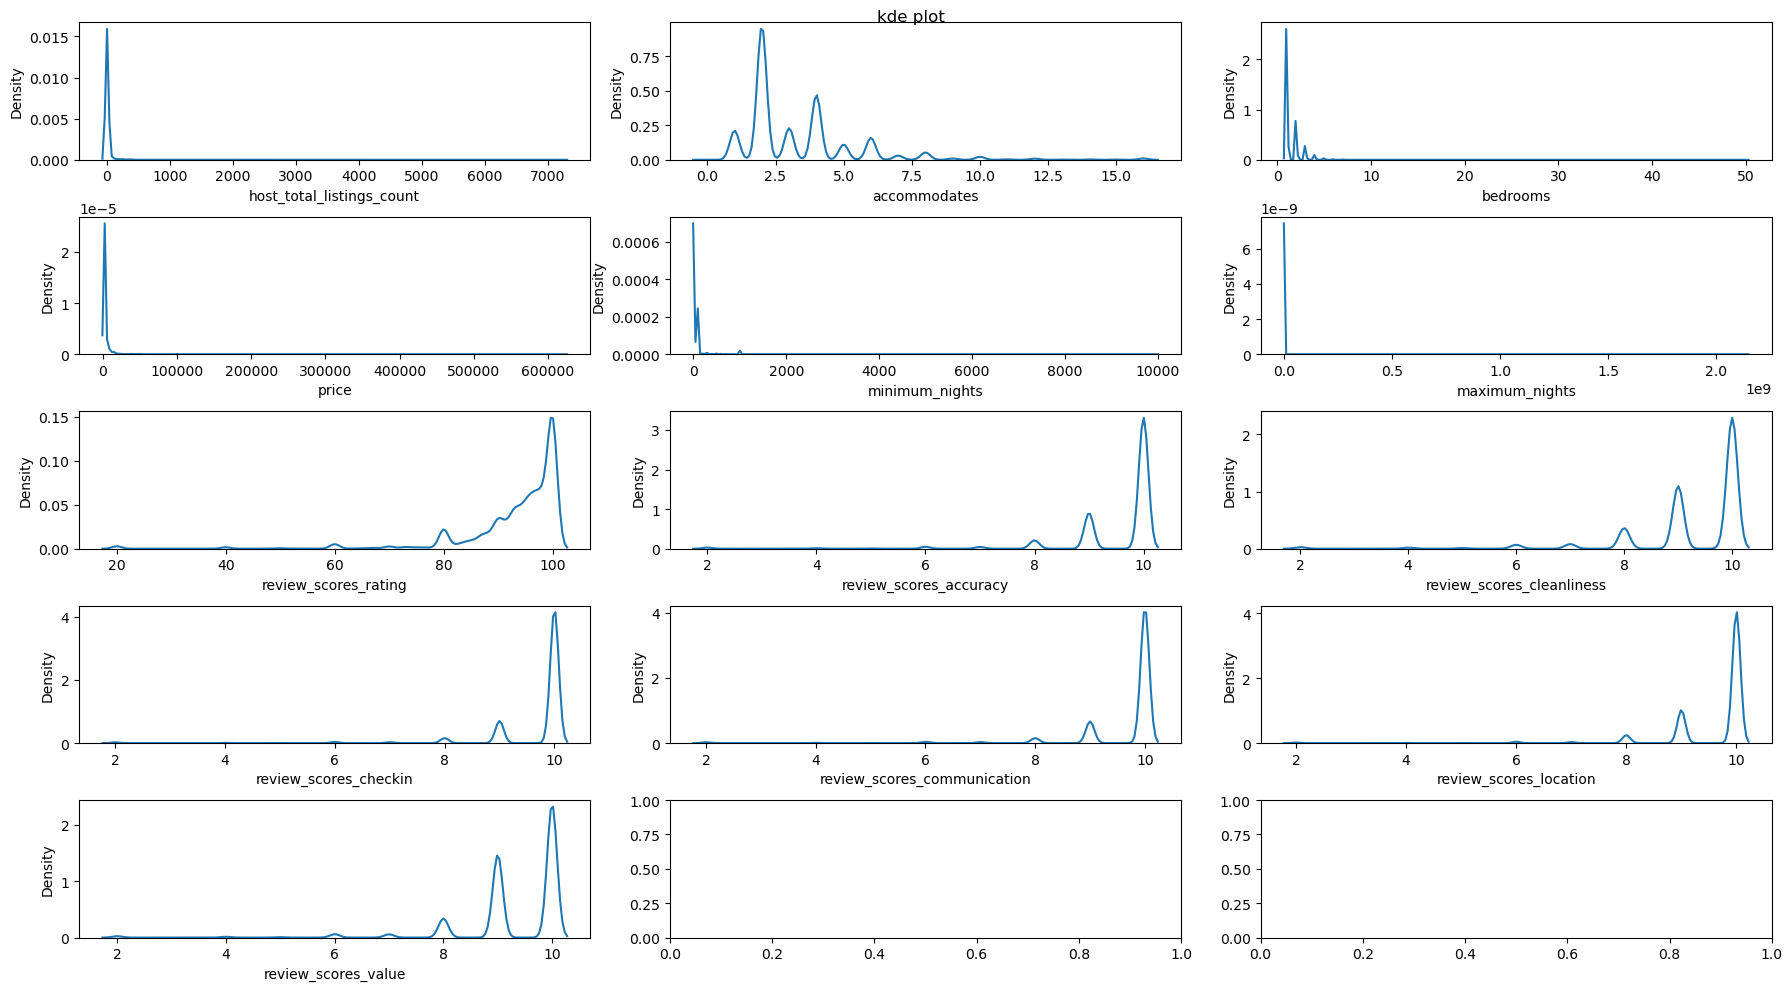

In [24]:
fig, axes = subplots()

fig.suptitle('kde plot')

for c, ax in zip(columns, axes.ravel()):
    sns.kdeplot(data=to_float_when_int(df[c]), ax=ax)

Looking at the graphs above, we can see that there are plenty of outliers that make the graphs obscure. Let's try it again, but *clipped*

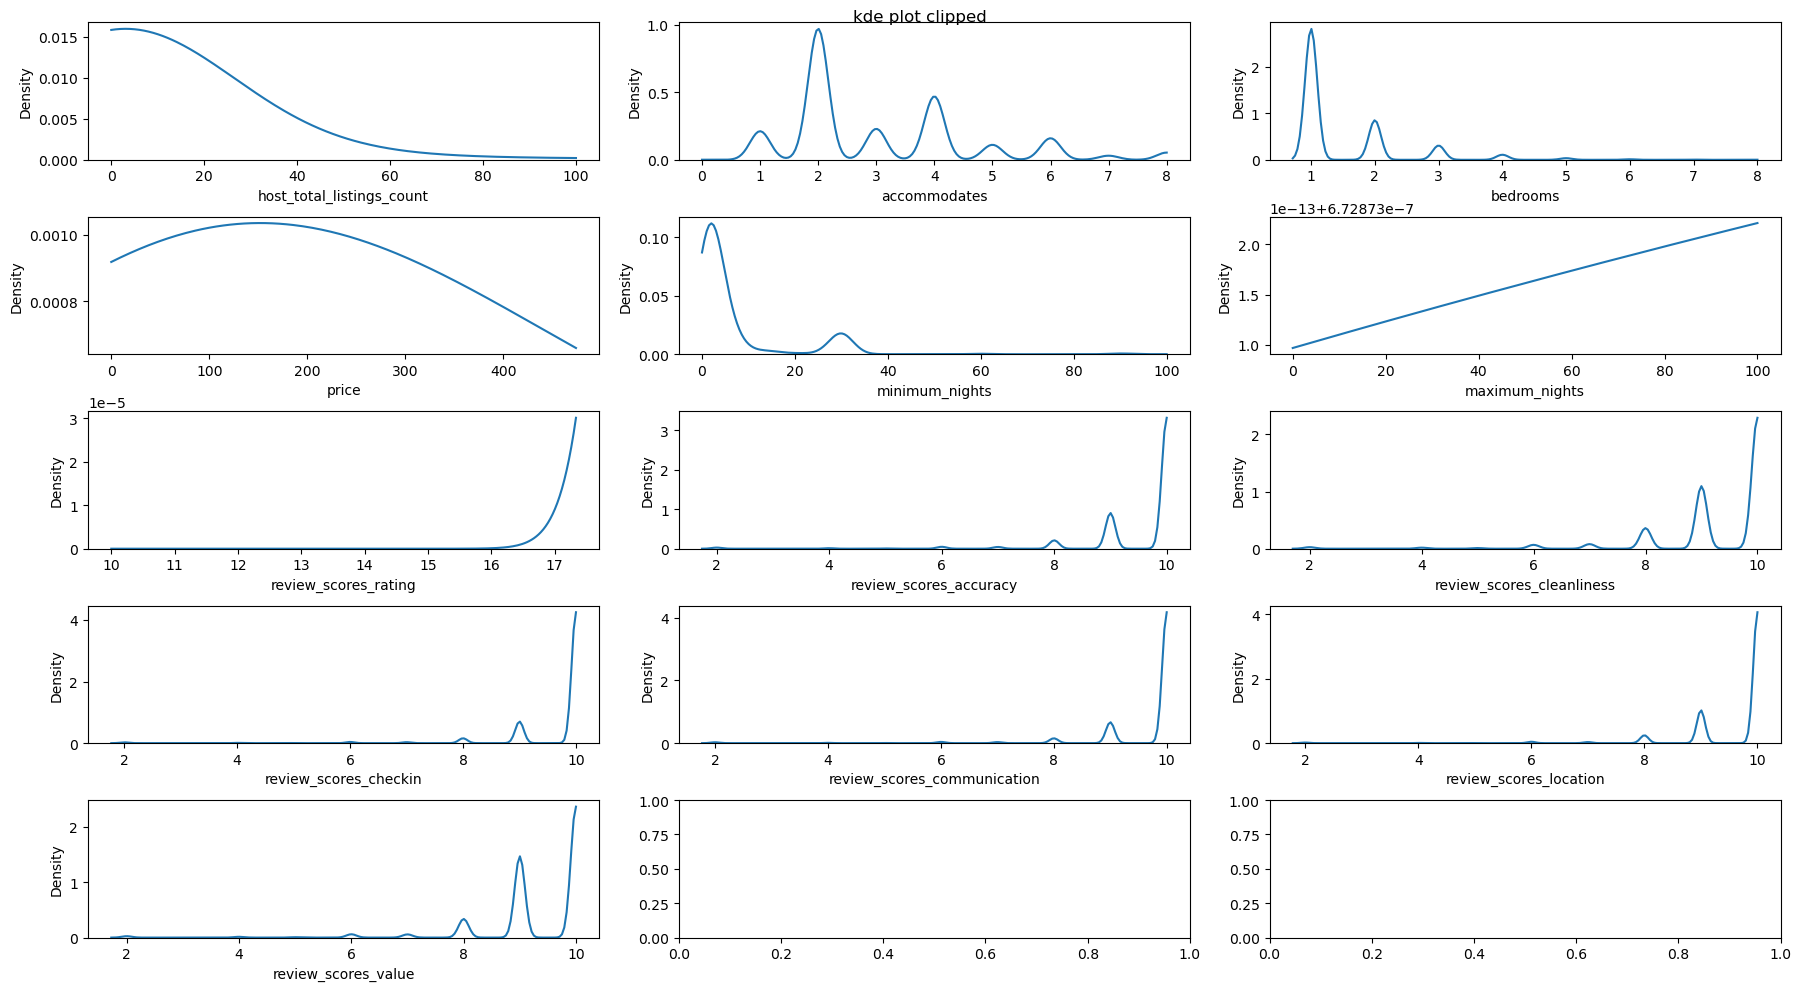

In [25]:
fig, axes = subplots()

fig.suptitle('kde plot clipped')

clips = [
    (0, 100),
    (0, 8),
    (0, 8),
    (0, df["price"].quantile(.75)),
    (0, 100),
    (0, 100),
    *[(0, 10) for _ in range(7)]  # reviews [0, 10]
]

for c, ax, clip in zip(columns, axes.ravel(), clips):
    sns.kdeplot(data=to_float_when_int(df[c]), ax=ax, clip=clip)

Because of odd data in the features `[minimum_nights, maximum_nights]`, I will drop these features from the data

In [26]:
df["minimum_nights"].min(), df["minimum_nights"].max()

(1, 9999)

In [27]:
df["maximum_nights"].min(), df["maximum_nights"].max()

(1, 2147483647)

### minimum- & maximum_nights

<Axes: xlabel='maximum_nights', ylabel='Density'>

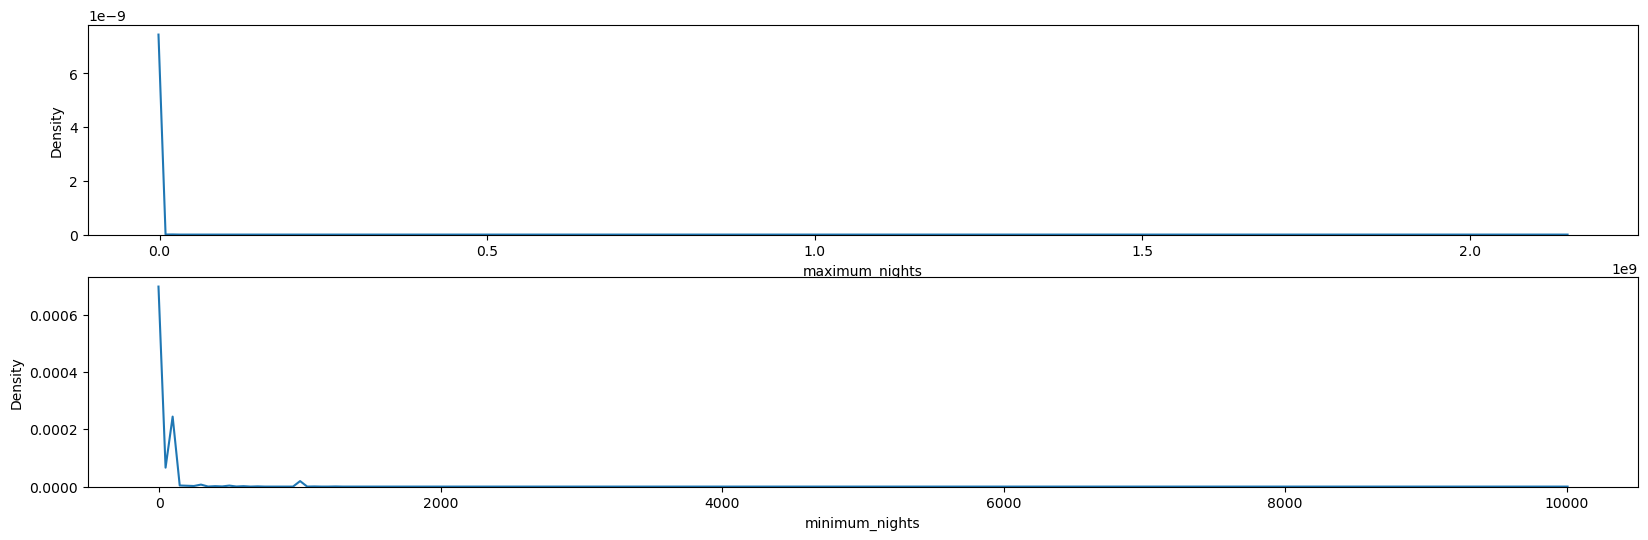

In [28]:
fig, axes = plt.subplots(
    2, 1,
    sharex=False,
    sharey=False,
    figsize=(20, 6)
)

sns.kdeplot(data=(df["minimum_nights"].astype(float)), ax=axes[1])
sns.kdeplot(data=(df["maximum_nights"].astype(float)), ax=axes[0])

In [29]:
df = df[df.columns.drop(['minimum_nights', "maximum_nights"])]

### Correlation

In [30]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bedrooms,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
host_acceptance_rate,1.000000,0.176316,0.034085,0.014588,0.100422,0.073135,-0.003525,-0.008704,-0.045264,-0.039315,-0.017294,-0.007801,0.028197,-0.013868,-0.011385,0.005349,0.000529,0.347575
host_is_superhost,0.176316,1.000000,-0.023472,0.021645,0.137860,-0.006738,-0.068604,0.043661,0.004405,0.007553,0.201202,0.179916,0.213582,0.143942,0.147957,0.116681,0.186098,0.035782
host_total_listings_count,0.034085,-0.023472,1.000000,0.004700,0.039111,-0.042281,0.061737,-0.018868,-0.009910,0.009907,-0.037162,-0.040658,-0.016856,-0.036414,-0.045739,-0.005259,-0.049027,0.057877
host_has_profile_pic,0.014588,0.021645,0.004700,1.000000,0.059439,0.003721,-0.007308,0.003596,-0.002328,-0.005700,0.013349,0.012735,0.008972,0.008238,0.010920,0.008610,0.006891,-0.002014
host_identity_verified,0.100422,0.137860,0.039111,0.059439,1.000000,0.061223,-0.037173,0.058853,0.014296,-0.008733,0.049754,0.054161,0.047383,0.039560,0.048585,0.057676,0.036643,0.006048
latitude,0.073135,-0.006738,-0.042281,0.003721,0.061223,1.000000,-0.417783,-0.111880,-0.137463,-0.099278,-0.034199,-0.007049,-0.035079,-0.023368,-0.011368,-0.043589,-0.022222,0.002959
longitude,-0.003525,-0.068604,0.061737,-0.007308,-0.037173,-0.417783,1.000000,0.009465,0.037800,0.019608,-0.048905,-0.052181,-0.045029,-0.043660,-0.033794,-0.052074,-0.039725,0.046586
accommodates,-0.008704,0.043661,-0.018868,0.003596,0.058853,-0.111880,0.009465,1.000000,0.639102,0.146327,0.006420,-0.009308,0.007203,0.004743,-0.000910,0.008774,-0.023706,0.009335
bedrooms,-0.045264,0.004405,-0.009910,-0.002328,0.014296,-0.137463,0.037800,0.639102,1.000000,0.143307,0.009007,-0.010811,0.002247,0.005562,-0.004753,0.008412,-0.019745,-0.017914
price,-0.039315,0.007553,0.009907,-0.005700,-0.008733,-0.099278,0.019608,0.146327,0.143307,1.000000,0.015048,-0.000693,0.024328,-0.000243,-0.003262,-0.000609,0.001572,0.013679


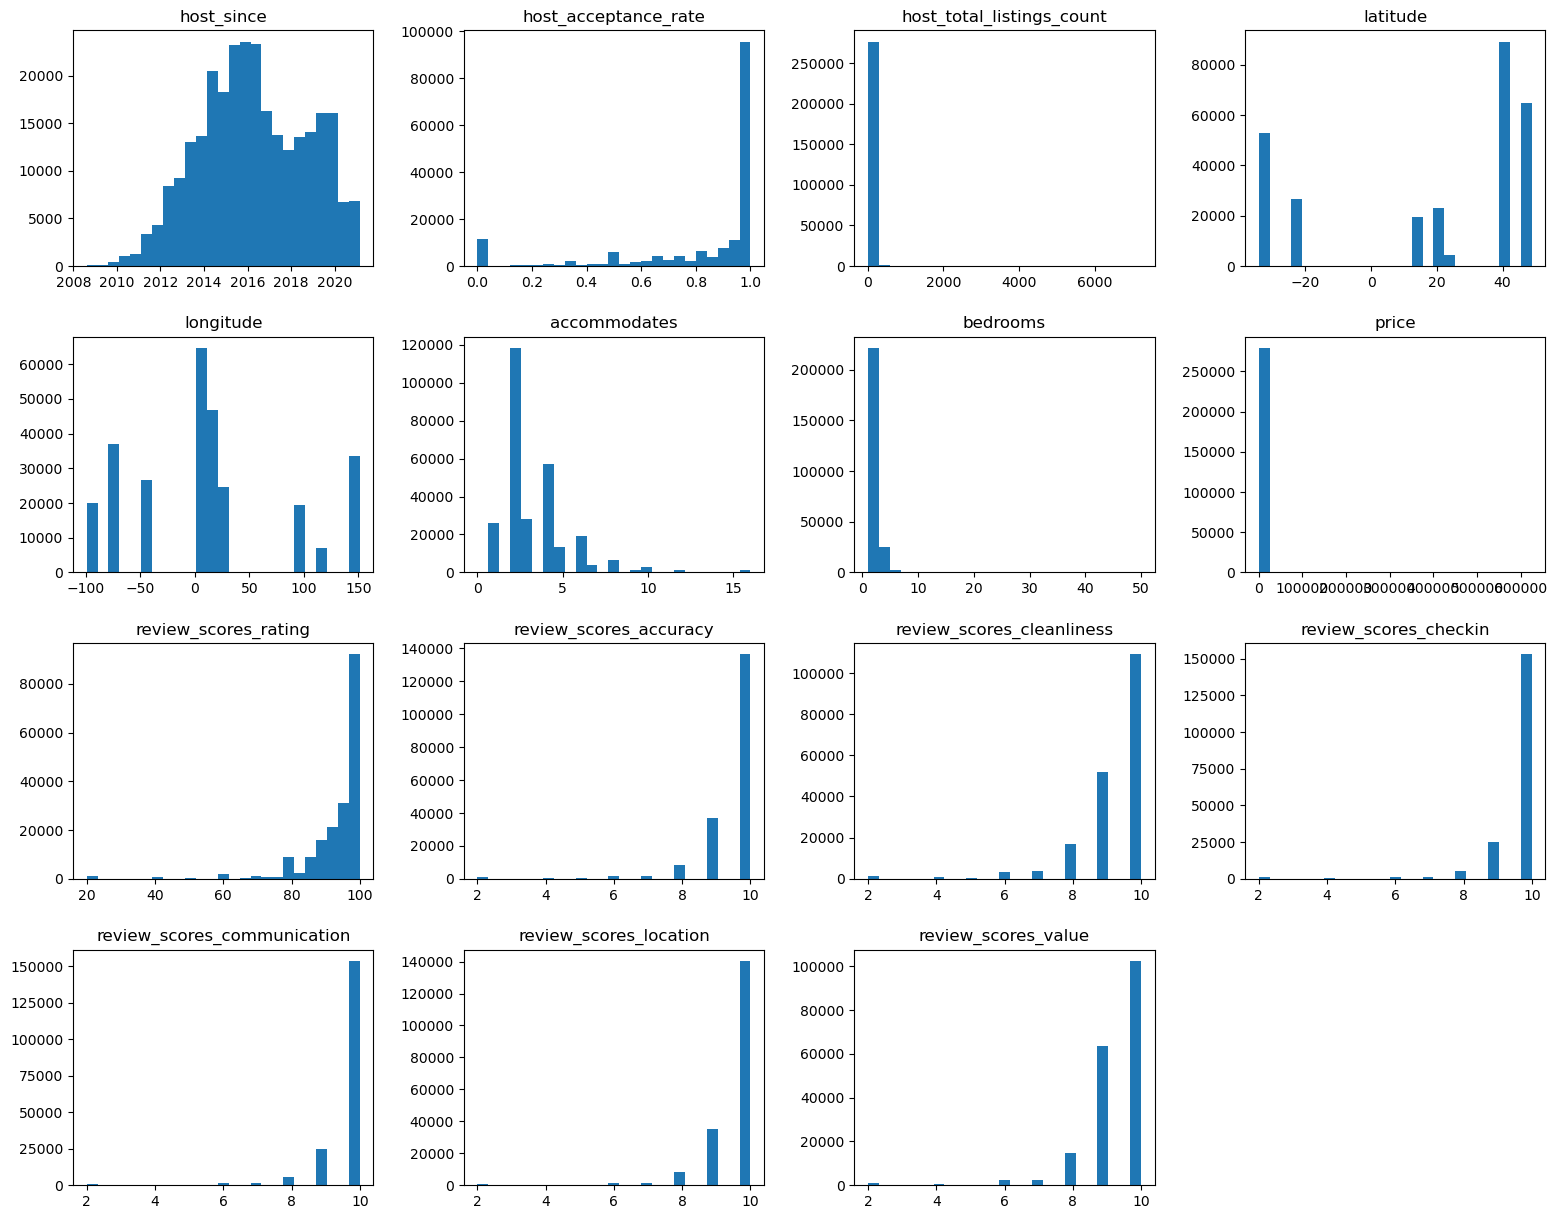

In [31]:
axes = df.hist(figsize=(19, 15), bins=25, grid=False)